# Working on analysis part of topic modeling

There are couple of pickle files extract from other work

- 1)-patent_firm_full_clean.pkl extracted from File1-Firm_Preprocessing
- 2)-eda.pkl extracted from File2-EDA
- 3)-work_on_data extracted from File3-Topic modeling

- Finally, we will create a pkl file from this as well for future use in visualizations. tech_type_per_topic.pkl

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [0]:
import nltk
import sys
import re, numpy as np, pandas as pd

In [5]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import plotly
import plotly.offline as pyo
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.graph_objs as go

In [0]:
# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

# Loading file

In [0]:
import pickle

In [11]:
p_firm = pd.read_pickle('patent_firm_full_clean.pkl')
p_firm.shape

FileNotFoundError: ignored

In [12]:
patent = pd.read_pickle('eda.pkl')
patent.shape

(43431, 37)

In [13]:
patent.head(2)

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,publn_first_grant,publn_claims,num_cpc_class,cpc_class,num_ipc_class,ipc_class,num_cited_publn,cited_publn_date,cited_publn,cited_appln,cited_appln_id,cited_family_id,num_cited_family,num_citing_publn,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,assignee,application_date,year
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,0,0,14,B60L 11/1824\nB60L 11/1874\nB60L 11/1877\nB...,5,H01M 4/02\nH01M 10/42\nH01M 12/06\nH02J ...,4,1968-12-17\n1978-04-11\n1985-08-13\n1990-01-16,US3416966A\nUS4084038A\nUS4534833A\nUS4894764A,US40978364A\nUS56408675A\nUS57929084A\nUS17915...,50665295\n51859631\n51971820\n48429986,23621952\n24130698\n27006578\n22655464,19,1,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,1,17,14,B60L 11/1824\nB60L 11/1874\nB60L 11/1877\nB...,5,H01M 4/02\nH01M 10/42\nH01M 12/06\nH02J ...,16,1968-12-17\n1970-09-15\n1973-02-13\n1974-11-12...,US3416966A\nUS3529229A\nUS3716413A\nUS3847671A...,US40978364A\nUS3529229DA\nUS3716413DA\nUS35106...,50665295\n49952673\n50283333\n49919639\n518596...,23621952\n24790872\n21994155\n23379411\n241306...,19,44,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,luz electric fuel israel ltd,1990-07-19,1990


In [14]:
data = pd.read_pickle('top08_topic_dominant.pkl')
data.shape

(43431, 5)

In [15]:
data.head(2)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.3857,"voltage, battery, circuit, power, module, dc, ...","[electrical, energy, system, include, electric..."
1,1,5.0,0.7969,"voltage, battery, circuit, power, module, dc, ...","[electrical, energy, system, include, electric..."


### Create a dataframe for working on paper

In [0]:
work_on_paper=data

In [0]:
work_on_paper.drop(['Text','Document_No'], axis=1, inplace=True)

In [0]:
work_on_paper['Assignee']=patent.assignee
work_on_paper['Year']=patent.year
work_on_paper['Abstract']=patent.appln_abstr

In [19]:
work_on_paper.head()

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract
0,5.0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
1,5.0,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...
2,2.0,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...
3,6.0,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj..."
4,4.0,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...


**Make topics as per pyvis**

In [0]:
work_on_paper['Topic']=work_on_paper.Dominant_Topic.map({0:'topic7', 1:'topic6',2 :'topic3',3:'topic8', 4: 'topic1',
                                                         5 : 'topic2', 6: 'topic5', 7:'topic4'})

In [21]:
work_on_paper.Topic.value_counts()

topic1    15371
topic2     7647
topic3     6455
topic4     5195
topic5     4022
topic6     3303
topic7      925
topic8      513
Name: Topic, dtype: int64

In [22]:
work_on_paper.Dominant_Topic.value_counts()

4.0    15371
5.0     7647
2.0     6455
7.0     5195
6.0     4022
1.0     3303
0.0      925
3.0      513
Name: Dominant_Topic, dtype: int64

**Check difference. I ll keep pyvis pattern for rest. So, variable "Topic" will be used now**

In [0]:
work_on_paper.drop(['Dominant_Topic'], axis=1, inplace=True)

In [24]:
work_on_paper.head(2)

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2


In [0]:
work_on_paper.to_pickle('work_on_paper.pkl')

# 1)- Pre-Model work

using eda.pkl and patent_firm_full_clean.pkl

In [0]:
p=patent

In [0]:
total_patents=p['assignee'].value_counts()

In [0]:
normal_patents=p['assignee'].value_counts(normalize=True)

In [0]:
df = pd.DataFrame({'Assigne': total_patents,
...                    'Commulative': normal_patents})

In [30]:
df.head(20)

,Assigne,Commulative
toyota motor corp,5680,0.131494
honda motor ltd,2662,0.061626
hyundai motor company,2190,0.050699
nissan motor co ltd,1904,0.044078
ford global technologies llc,1296,0.030003
mitsubishi motors corp,847,0.019608
robert bosch gmbh,557,0.012895
hitachi automotive systems ltd,481,0.011135
aisin seiki co ltd,405,0.009376
denso corporation,380,0.008797


**That was our table 1: Top assignee of patents**

### Alternative method of doing this

In [31]:
p['assignee'].value_counts().head()

toyota motor corp               5680
honda motor ltd                 2662
hyundai motor company           2190
nissan motor co ltd             1904
ford global technologies llc    1296
Name: assignee, dtype: int64

In [0]:
assigne_data=p['assignee'].value_counts()

In [0]:
df_assigne= pd.DataFrame(data=assigne_data)

In [34]:
df_assigne.head(2)

,assignee
toyota motor corp,5680
honda motor ltd,2662


In [0]:
df_assigne['Commulative']=p['assignee'].value_counts(normalize=True)

In [36]:
df_assigne.head(2)

,assignee,Commulative
toyota motor corp,5680,0.131494
honda motor ltd,2662,0.061626


### Alternative way 2

In [37]:
value_counts = p['assignee'].value_counts(dropna=True, sort=True)
data = value_counts.rename_axis('Top Companies').reset_index(name='patent-counts')
df_val_counts = pd.DataFrame(data)
df_val_counts[:40]

,Top Companies,patent-counts
0,toyota motor corp,5680
1,honda motor ltd,2662
2,hyundai motor company,2190
3,nissan motor co ltd,1904
4,ford global technologies llc,1296
5,mitsubishi motors corp,847
6,robert bosch gmbh,557
7,hitachi automotive systems ltd,481
8,aisin seiki co ltd,405
9,denso corporation,380


In [38]:
df.Commulative[:5]

toyota motor corp               0.131494
honda motor ltd                 0.061626
hyundai motor company           0.050699
nissan motor co ltd             0.044078
ford global technologies llc    0.030003
Name: Commulative, dtype: float64

In [39]:
value_counts_norm = p['assignee'].value_counts(normalize=True , dropna=True, sort=True)
data2 = value_counts_norm.rename_axis('Top Companies').reset_index(name='patent-counts in percetange')
df_val_counts_norm = pd.DataFrame(data2)
df_val_counts_norm[:40]

,Top Companies,patent-counts in percetange
0,toyota motor corp,0.131494
1,honda motor ltd,0.061626
2,hyundai motor company,0.050699
3,nissan motor co ltd,0.044078
4,ford global technologies llc,0.030003
5,mitsubishi motors corp,0.019608
6,robert bosch gmbh,0.012895
7,hitachi automotive systems ltd,0.011135
8,aisin seiki co ltd,0.009376
9,denso corporation,0.008797


In [40]:
df_val_counts_norm['Patent-Count']=df_val_counts['patent-counts']
df_val_counts_norm[:40]

,Top Companies,patent-counts in percetange,Patent-Count
0,toyota motor corp,0.131494,5680
1,honda motor ltd,0.061626,2662
2,hyundai motor company,0.050699,2190
3,nissan motor co ltd,0.044078,1904
4,ford global technologies llc,0.030003,1296
5,mitsubishi motors corp,0.019608,847
6,robert bosch gmbh,0.012895,557
7,hitachi automotive systems ltd,0.011135,481
8,aisin seiki co ltd,0.009376,405
9,denso corporation,0.008797,380


**This is our final table results**

# Figure 3

In [41]:
p.groupby(p.year).size()

year
1990      96
1991     146
1992     310
1993     417
1994     384
1995     469
1996     500
1997     622
1998     682
1999     882
2000     914
2001    1038
2002    1113
2003    1291
2004    1208
2005    1375
2006    1943
2007    2193
2008    2016
2009    2584
2010    3454
2011    4594
2012    4036
2013    3507
2014    3070
2015    2646
2016    1619
2017     322
dtype: int64

In [42]:
#Or we can
p.year.value_counts().sort_index()

1990      96
1991     146
1992     310
1993     417
1994     384
1995     469
1996     500
1997     622
1998     682
1999     882
2000     914
2001    1038
2002    1113
2003    1291
2004    1208
2005    1375
2006    1943
2007    2193
2008    2016
2009    2584
2010    3454
2011    4594
2012    4036
2013    3507
2014    3070
2015    2646
2016    1619
2017     322
Name: year, dtype: int64

In [43]:
p.year.value_counts(ascending=True).sort_index()

1990      96
1991     146
1992     310
1993     417
1994     384
1995     469
1996     500
1997     622
1998     682
1999     882
2000     914
2001    1038
2002    1113
2003    1291
2004    1208
2005    1375
2006    1943
2007    2193
2008    2016
2009    2584
2010    3454
2011    4594
2012    4036
2013    3507
2014    3070
2015    2646
2016    1619
2017     322
Name: year, dtype: int64

In [0]:
# For checking distribution of patent over years
dist=p.year.value_counts(ascending=True).sort_index()

In [45]:
type(dist)

pandas.core.series.Series

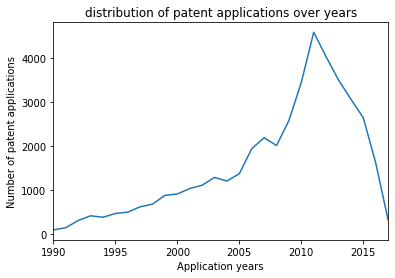

In [46]:
dist.plot()
plt.xlabel('Application years')
plt.ylabel('Number of patent applications')
plt.title('distribution of patent applications over years')
#plt.legend()
plt.show()

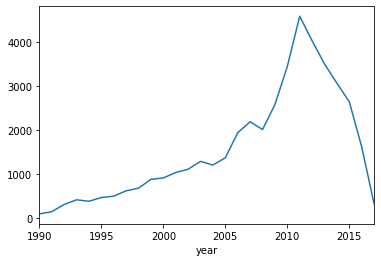

In [47]:
# We can always use groupby. Here we have two variables "year" and "granted"
p.groupby(p.year).granted.count().plot()

**The steep drop in patent applications in 2014 is due to the patent ﬁlling process at the USPTO, which involves a signiﬁcant time lag between the ﬁling and disclosure or registration of applications, ranging from several months to over two years.**

So work uptill fig 3 is done

### using plotly

In [0]:
value=p.year.value_counts().sort_index()

In [0]:
value_df=pd.DataFrame(data=value)

In [50]:
value_df.head()

,year
1990,96
1991,146
1992,310
1993,417
1994,384


In [51]:
pyo.plot([{
    'x' : value_df.index,
    'y' : value_df[col],
    'name' : col
  

}for col in value_df.columns],filename='distribution.html')

'distribution.html'

In [0]:
traces=[go.Scatter(
    x=value_df.index,
    y=value_df[col],
    name= col



)for col in value_df.columns]

In [0]:
data=traces

In [0]:
layout=go.Layout(
title='Patent distribution over the year',
xaxis=dict(title='Application years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [0]:
figure1= go.Figure(data=data, layout=layout)

In [56]:
pyo.plot(figure1,filename='distribution2.html')

'distribution2.html'

# 2)-After Modeling

### 4a) Change in the number of patents 

In [0]:
data = pd.read_pickle('work_on_paper.pkl')

In [58]:
data.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3
3,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1


In [59]:
data.Topic.value_counts()

topic1    15371
topic2     7647
topic3     6455
topic4     5195
topic5     4022
topic6     3303
topic7      925
topic8      513
Name: Topic, dtype: int64

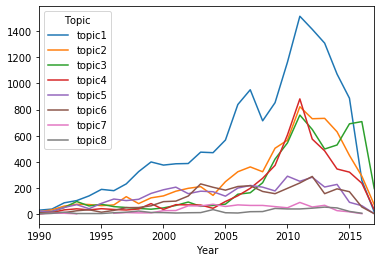

In [60]:
d=data
d=d.groupby(["Year","Topic"]).size()
d=d.unstack('Topic')
d.plot()

# Using plotly

In [0]:
d=data

In [0]:
d=d.groupby(["Year","Topic"]).size()

In [63]:
d.head()

Year    Topic 
1990.0  topic1    30
        topic2    19
        topic3    12
        topic4     1
        topic5    22
dtype: int64

In [0]:
df_patent=d.unstack('Topic')

In [65]:
type(df_patent)

pandas.core.frame.DataFrame

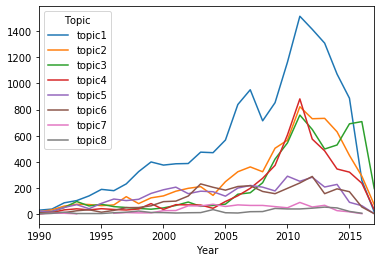

In [66]:
df_patent.plot()

In [0]:
df_patent2=df_patent.T

In [68]:
df_patent2

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,,,,,,,,
topic1,30.0,38.0,86.0,103.0,139.0,189.0,179.0,231.0,325.0,399.0,375.0,385.0,387.0,474.0,470.0,567.0,839.0,952.0,714.0,853.0,1163.0,1515.0,1415.0,1309.0,1072.0,887.0,258.0,16.0
topic2,19.0,32.0,61.0,75.0,73.0,64.0,70.0,133.0,80.0,124.0,139.0,175.0,197.0,210.0,143.0,248.0,324.0,361.0,324.0,504.0,566.0,822.0,730.0,733.0,630.0,449.0,290.0,71.0
topic3,12.0,19.0,50.0,96.0,62.0,75.0,57.0,50.0,43.0,37.0,47.0,66.0,92.0,59.0,66.0,76.0,152.0,163.0,240.0,421.0,545.0,758.0,648.0,498.0,529.0,691.0,708.0,195.0
topic4,1.0,12.0,32.0,40.0,32.0,41.0,35.0,31.0,39.0,80.0,35.0,72.0,70.0,69.0,44.0,96.0,140.0,197.0,274.0,373.0,606.0,882.0,574.0,484.0,345.0,321.0,236.0,34.0
topic5,22.0,20.0,50.0,72.0,41.0,82.0,115.0,103.0,113.0,158.0,186.0,206.0,156.0,175.0,171.0,137.0,199.0,219.0,206.0,177.0,290.0,251.0,282.0,207.0,227.0,90.0,64.0,3.0
topic6,8.0,14.0,11.0,25.0,33.0,14.0,28.0,49.0,50.0,63.0,95.0,99.0,138.0,231.0,205.0,183.0,211.0,217.0,173.0,156.0,197.0,238.0,288.0,156.0,193.0,171.0,54.0,3.0
topic7,2.0,6.0,6.0,2.0,NaN,NaN,6.0,11.0,9.0,9.0,26.0,27.0,63.0,62.0,75.0,58.0,70.0,66.0,66.0,57.0,48.0,89.0,54.0,67.0,26.0,17.0,3.0,NaN
topic8,2.0,5.0,14.0,4.0,4.0,4.0,10.0,14.0,23.0,12.0,11.0,8.0,10.0,11.0,34.0,10.0,8.0,18.0,19.0,43.0,39.0,39.0,45.0,53.0,47.0,20.0,6.0,NaN


In [0]:
traces=[go.Scatter(
    x=df_patent2.columns,
    y=df_patent2.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent2.index]

In [0]:
data=traces

In [0]:
layout=go.Layout(
title='Change in the number of patents over filling years',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [0]:
#layout=go.Layout(title='Change in the number of patents over filling years')

In [0]:
figure1= go.Figure(data=data, layout=layout)

In [74]:
pyo.plot(figure1,filename='Change in the number of patents.html')

'Change in the number of patents.html'

**Alternative way**

In [0]:
data = pd.read_pickle('work_on_paper.pkl')

In [0]:
f=data.groupby(data.Year).Topic.value_counts()

In [77]:
f[:5]

Year    Topic 
1990.0  topic1    30
        topic5    22
        topic2    19
        topic3    12
        topic6     8
Name: Topic, dtype: int64

In [0]:
f=f.unstack('Topic')

In [79]:
f[:5]

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Year,,,,,,,,


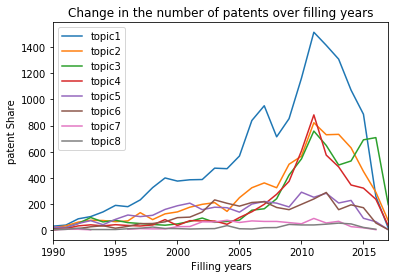

In [80]:
f.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the number of patents over filling years')
plt.legend()
plt.show()

**result of figure 4a**

### 4(b) Change in the share of patents over filing year

In [81]:
data.Topic.value_counts(normalize=True)

topic1    0.353918
topic2    0.176072
topic3    0.148627
topic4    0.119615
topic5    0.092607
topic6    0.076052
topic7    0.021298
topic8    0.011812
Name: Topic, dtype: float64

In [82]:
data.groupby(data.Year).Topic.value_counts(normalize=True)

Year    Topic 
1990.0  topic1    0.312500
        topic5    0.229167
        topic2    0.197917
        topic3    0.125000
        topic6    0.083333
                    ...   
2017.0  topic2    0.220497
        topic4    0.105590
        topic1    0.049689
        topic5    0.009317
        topic6    0.009317
Name: Topic, Length: 220, dtype: float64

In [0]:
c=data.groupby(data.Year).Topic.value_counts(normalize=True)

In [0]:
c=c.unstack('Topic')

In [85]:
c[:5]

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Year,,,,,,,,


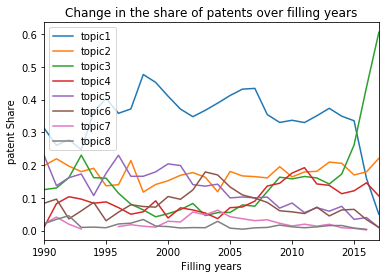

In [86]:
c.plot()
plt.xlabel('Filling years')
plt.ylabel('patent Share')
plt.title('Change in the share of patents over filling years')
plt.legend()
plt.show()

### Using plotly

In [0]:
df_patent=c.T

In [88]:
df_patent

Year,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Topic,,,,,,,,,,,,,,,,,,,,,,,,,,,,
topic1,0.312500,0.260274,0.277419,0.247002,0.361979,0.402985,0.358,0.371383,0.476540,0.452381,0.410284,0.370906,0.347709,0.367157,0.389073,0.412364,0.431806,0.434109,0.354167,0.330108,0.336711,0.329778,0.350595,0.373253,0.349299,0.335223,0.159358,0.049689
topic2,0.197917,0.219178,0.196774,0.179856,0.190104,0.136461,0.140,0.213826,0.117302,0.140590,0.152079,0.168593,0.176999,0.162665,0.118377,0.180364,0.166752,0.164615,0.160714,0.195046,0.163868,0.178929,0.180872,0.209011,0.205279,0.169690,0.179123,0.220497
topic3,0.125000,0.130137,0.161290,0.230216,0.161458,0.159915,0.114,0.080386,0.063050,0.041950,0.051422,0.063584,0.082659,0.045701,0.054636,0.055273,0.078230,0.074327,0.119048,0.162926,0.157788,0.164998,0.160555,0.142002,0.172369,0.261149,0.437307,0.605590
topic4,0.010417,0.082192,0.103226,0.095923,0.083333,0.087420,0.070,0.049839,0.057185,0.090703,0.038293,0.069364,0.062893,0.053447,0.036424,0.069818,0.072054,0.089831,0.135913,0.144350,0.175449,0.191990,0.142220,0.138010,0.112414,0.121315,0.145769,0.105590
topic5,0.229167,0.136986,0.161290,0.172662,0.106771,0.174840,0.230,0.165595,0.165689,0.179138,0.203501,0.198459,0.140162,0.135554,0.141556,0.099636,0.102419,0.099863,0.102183,0.068498,0.083961,0.054636,0.069871,0.059025,0.073965,0.034014,0.039531,0.009317
topic6,0.083333,0.095890,0.035484,0.059952,0.085938,0.029851,0.056,0.078778,0.073314,0.071429,0.103939,0.095376,0.123989,0.178931,0.169702,0.133091,0.108595,0.098951,0.085813,0.060372,0.057035,0.051807,0.071358,0.044482,0.062887,0.064626,0.033354,0.009317
topic7,0.020833,0.041096,0.019355,0.004796,NaN,NaN,0.012,0.017685,0.013196,0.010204,0.028446,0.026012,0.056604,0.048025,0.062086,0.042182,0.036027,0.030096,0.032738,0.022059,0.013897,0.019373,0.013380,0.019105,0.008472,0.006425,0.001853,NaN
topic8,0.020833,0.034247,0.045161,0.009592,0.010417,0.008529,0.020,0.022508,0.033724,0.013605,0.012035,0.007707,0.008985,0.008521,0.028146,0.007273,0.004117,0.008208,0.009425,0.016641,0.011291,0.008489,0.011150,0.015113,0.015314,0.007559,0.003706,NaN


In [0]:
traces=[go.Scatter(
    x=df_patent.columns,
    y=df_patent.loc[row_name],
    mode='lines+markers',
    name=row_name



)for row_name in df_patent.index]

In [0]:
data=traces

In [0]:
layout=go.Layout(
title='Change in the share of patents over filing year',
xaxis=dict(title='Number of filling years'),
yaxis=dict(title='Number of patents'),
hovermode='closest' # for bringing values of points together as x and y
)

In [0]:
figure2= go.Figure(data=data, layout=layout)

In [93]:
pyo.plot(figure2,filename='patent_count_normalized.html')

'patent_count_normalized.html'

### Table 6: Major assignee by topic type

In [0]:
df=pd.read_pickle('work_on_paper.pkl')

In [95]:
from collections import Counter
Counter(df.Topic)

Counter({'topic1': 15371,
         'topic2': 7647,
         'topic3': 6455,
         'topic4': 5195,
         'topic5': 4022,
         'topic6': 3303,
         'topic7': 925,
         'topic8': 513})

In [0]:
company=df.groupby(df.Topic).Assignee.value_counts(dropna=True, sort=True)

In [97]:
df_company = pd.DataFrame(company)
df_company

Assignee
Topic  Assignee                                      
topic1 toyota motor corp                         3359
       nissan motor co ltd                       1247
       hyundai motor company                     1235
       honda motor ltd                           1069
       ford global technologies llc               788
...                                               ...
topic8 yamaha motor co ltd                          1
       yamashita yoshinori                          1
       yang zhanfa                                  1
       yu hai                                       1
       zhengzhou nissan automobile co  ltd          1

[12023 rows x 1 columns]

**For a specific topic listing wrt firms**

In [0]:
topic_firm=df.groupby([df['Topic']=='topic1']).Assignee.value_counts(dropna=True, sort=True)

In [99]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:10]

Assignee
Topic Assignee                                
False toyota motor corp                   2321
      honda motor ltd                     1593
      hyundai motor company                955
      nissan motor co ltd                  657
      mitsubishi motors corp               517
      ford global technologies llc         508
      robert bosch gmbh                    329
      hitachi automotive systems ltd       293
      general motors corporation           221
      lsis co  ltd                         213

In [0]:
d=df
d=d[d.Topic=="topic1"]

In [101]:
len(d)

15371

In [102]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1
5,0.5652,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1
6,0.4909,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a modular internal co...,topic1
14,0.6535,"engine, torque, clutch, mode, speed, motor, ge...",elin energieanwendung gesellschaft m b h,1992.0,The invention is a drive for an electric vehic...,topic1
18,0.4505,"engine, torque, clutch, mode, speed, motor, ge...",i sense pty ltd,2002.0,A gas substitution system for a dual fuel dies...,topic1


In [0]:
d=d.groupby(['Assignee']).size()

In [104]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 3359
nissan motor co ltd               1247
hyundai motor company             1235
honda motor ltd                   1069
ford global technologies llc       788
mitsubishi motors corp             329
aisin seiki co ltd                 325
robert bosch gmbh                  228
hitachi automotive systems ltd     188
denso corporation                  178
dtype: int64

**These are top 10 firms using Topic 1**

#### For topic2

In [105]:
k=df
k=k[k.Topic=="topic2"]
len(k)

7647

In [106]:
k[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
7,0.4658,"voltage, battery, circuit, power, module, dc, ...",fronius schweismaschinen produktion gmbh co ...,1991.0,Charging batteries involves using an external ...,topic2
9,0.8473,"voltage, battery, circuit, power, module, dc, ...",steyr daimler puch ag wien at,1994.0,The regulating circuit has a microprocessor re...,topic2
12,0.7235,"voltage, battery, circuit, power, module, dc, ...",steyr daimler puch aktiengesellschaft,1991.0,A control circuit having a controller provided...,topic2


In [107]:
k=k.groupby(['Assignee']).size()
k.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 568
honda motor ltd                   326
hyundai motor company             322
mitsubishi motors corp            137
nissan motor co ltd               130
ford global technologies llc      105
hitachi automotive systems ltd     92
lsis co  ltd                       82
sony corporation                   78
general electric company           63
dtype: int64

#### For topic 3

In [108]:
e=df
e=e[e.Topic=="topic3"]
len(e)

6455

In [109]:
e[:2]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3
10,0.4512,"charge, pile, automobile, utility, model, body...",steyr daimler puch ag wien at,1993.0,A drive unit for an electric vehicle comprises...,topic3


In [110]:
e=e.groupby(['Assignee']).size()
e.sort_values(ascending=False)[:10]

Assignee
honda motor ltd                                       387
toyota motor corp                                     212
nissan motor co ltd                                    99
mitsubishi motors corp                                 70
ford global technologies llc                           63
yamaha hatsudoki kabushiki kaisha                      61
state grid corporation of china                        58
hyundai motor company                                  57
panasonic corporation                                  55
korea advanced institute of science and technology     49
dtype: int64

#### For topic4

In [111]:
f=df
f=f[f.Topic=="topic4"]
len(f)

5195

In [112]:
f=f.groupby(['Assignee']).size()
f.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 345
mitsubishi motors corp            181
honda motor ltd                   177
hyundai motor company             143
lsis co  ltd                       95
nissan motor co ltd                91
ford global technologies llc       83
general electric company           76
denso corporation                  75
hitachi automotive systems ltd     52
dtype: int64

#### For topic5

In [113]:
g=df
g=g[g.Topic=="topic5"]
len(g)

4022

In [114]:
g=g.groupby(['Assignee']).size()
g.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 707
honda motor ltd                   266
robert bosch gmbh                 229
ford global technologies llc      189
hyundai motor company             129
nissan motor co ltd               120
renault sas                        89
mitsubishi motors corp             79
daimler ag                         73
hitachi automotive systems ltd     64
dtype: int64

#### For topic6

In [115]:
h=df
h=h[h.Topic=="topic6"]
len(h)

3303

In [116]:
h=h.groupby(['Assignee']).size()
h.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 428
honda motor ltd                   390
hyundai motor company             229
nissan motor co ltd               152
suzuki motor corp                 119
mitsubishi motors corp             42
ford global technologies llc       42
general motors corporation         41
renault sas                        35
hitachi automotive systems ltd     32
dtype: int64

#### For topic7

In [117]:
i=df
i=i[i.Topic=="topic7"]
len(i)

925

In [118]:
i=i.groupby(['Assignee']).size()
i.sort_values(ascending=False)[:10]

Assignee
nissan motor co ltd                        60
toyota motor corp                          52
sony corporation                           47
honda motor ltd                            24
sony corp                                  21
hyundai motor company                      19
samsung sdi co  ltd                        19
matsushita electric industrial co  ltd     12
toray industries inc                       12
johnson matthey fuel cells limited         10
dtype: int64

#### topic8

In [119]:
j=df
j=j[j.Topic=="topic8"]
len(j)

513

In [120]:
j=j.groupby(['Assignee']).size()
j.sort_values(ascending=False)[:10]

Assignee
hyundai motor company                                 56
ford global technologies llc                          23
honda motor ltd                                       23
hitachi automotive systems ltd                        16
future motion inc                                     14
textron inc                                           11
robert bosch gmbh                                     11
qualcomm incorporated                                  9
toyota motor corp                                      9
korea advanced institute of science and technology     8
dtype: int64

### **Using crosstab**

In [121]:
df.Assignee.value_counts()[:20]

toyota motor corp                 5680
honda motor ltd                   2662
hyundai motor company             2190
nissan motor co ltd               1904
ford global technologies llc      1296
mitsubishi motors corp             846
robert bosch gmbh                  557
hitachi automotive systems ltd     481
aisin seiki co ltd                 405
denso corporation                  380
suzuki motor corp                  359
general motors corporation         346
renault sas                        287
peugeot citroen automobiles sa     244
lsis co  ltd                       222
daimler ag                         212
panasonic corporation              198
mazda motor corp                   194
sony corporation                   192
general electric company           183
Name: Assignee, dtype: int64

In [122]:
w=df
w=w[w.Assignee=="toyota motor corp"]
w[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
1084,0.8502,"engine, torque, clutch, mode, speed, motor, ge...",toyota motor corp,1997.0,PROBLEM TO BE SOLVED: To provide a power gener...,topic1
1092,0.6745,"engine, torque, clutch, mode, speed, motor, ge...",toyota motor corp,1993.0,PURPOSE:To prevent overcharge or overdischarge...,topic1
1093,0.6591,"voltage, battery, circuit, power, module, dc, ...",toyota motor corp,1994.0,PURPOSE:To prevent a large discharge current f...,topic2
1094,0.8237,"engine, torque, clutch, mode, speed, motor, ge...",toyota motor corp,1997.0,PROBLEM TO BE SOLVED: To control the driving t...,topic1
1095,0.8278,"engine, torque, clutch, mode, speed, motor, ge...",toyota motor corp,1999.0,"In a planetary gear unit 120, a planetary carr...",topic1


In [123]:
len(w)

5680

In [124]:
pd.crosstab(df.Assignee=="toyota motor corp", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,12012,7079,6243,4850,3315,2875,873,504
True,3359,568,212,345,707,428,52,9


In [125]:
pd.crosstab(df.Assignee=="robert bosch gmbh", df.Topic)

Topic,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8
Assignee,,,,,,,,
False,15143,7611,6447,5168,3793,3288,922,502
True,228,36,8,27,229,15,3,11


# 3)-Share of patents by  technological topics

table 3 in paper

- As we have decline after 2011. It had highest patents i.e 4594. So we shall take it as base year for current patent share.

- For CAGR, we will use 2009-2013(a 5 year period). This is to represent patent sample in a symmetric way.

In [0]:
df = pd.read_pickle('work_on_paper.pkl')

In [127]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3
3,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1


In [128]:
# start with 2011 as of base year
df.groupby(df.Year==2011).Topic.value_counts(ascending=False)

Year   Topic 
False  topic1    13856
       topic2     6825
       topic3     5697
       topic4     4313
       topic5     3771
       topic6     3065
       topic7      836
       topic8      474
True   topic1     1515
       topic4      882
       topic2      822
       topic3      758
       topic5      251
       topic6      238
       topic7       89
       topic8       39
Name: Topic, dtype: int64

4594 for 2011<br>
4594/43431=10.57 %

#### Other way using without value_counts i.e multi-indexing

In [0]:
filling_year=df['Year']

In [130]:
filling_year[:5]

0    1990.0
1    1990.0
2    2002.0
3    2002.0
4    2002.0
Name: Year, dtype: float64

In [0]:
filling_year_2011=df[df.Year == 2011.0 ]

In [0]:
appear=filling_year_2011.groupby(['Topic']).size().sort_values(ascending=False)

In [133]:
appear_2011 = pd.DataFrame(appear)
appear_2011

,0
Topic,
topic1,1515
topic4,882
topic2,822
topic3,758
topic5,251
topic6,238
topic7,89
topic8,39


### for patent share

In [134]:
# for total number 

df.groupby(df.Year==2011).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    13856
       topic2     6825
       topic3     5697
       topic4     4313
       topic5     3771
       topic6     3065
       topic7      836
       topic8      474
True   topic1     1515
       topic2      822
       topic3      758
       topic4      882
       topic5      251
       topic6      238
       topic7       89
       topic8       39
Name: Topic, dtype: int64

In [135]:
df.groupby(df.Year==2011).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.356773
       topic2    0.175734
       topic3    0.146690
       topic4    0.111054
       topic5    0.097098
       topic6    0.078920
       topic7    0.021526
       topic8    0.012205
True   topic1    0.329778
       topic2    0.178929
       topic3    0.164998
       topic4    0.191990
       topic5    0.054636
       topic6    0.051807
       topic7    0.019373
       topic8    0.008489
Name: Topic, dtype: float64

In [136]:
df.groupby(df.Year==2011).Topic.count()

Year
False    38837
True      4594
Name: Topic, dtype: int64

**Total patents in 2011 are 4594**

- Let's varify : 

topic1= 1515/4594= 0.3297.....hence Correct

### Calculate CAGR
https://www.investopedia.com/terms/c/cagr.asp

We will consider years from 2010-2014

In [137]:
len(df[df.Year== 2010])

3454

In [138]:
df.groupby(df.Year==2010).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    14208
       topic2     7081
       topic3     5910
       topic4     4589
       topic5     3732
       topic6     3106
       topic7      877
       topic8      474
True   topic1     1163
       topic2      566
       topic3      545
       topic4      606
       topic5      290
       topic6      197
       topic7       48
       topic8       39
Name: Topic, dtype: int64

In [139]:
df.groupby(df.Year==2010).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.355404
       topic2    0.177127
       topic3    0.147835
       topic4    0.114791
       topic5    0.093354
       topic6    0.077695
       topic7    0.021938
       topic8    0.011857
True   topic1    0.336711
       topic2    0.163868
       topic3    0.157788
       topic4    0.175449
       topic5    0.083961
       topic6    0.057035
       topic7    0.013897
       topic8    0.011291
Name: Topic, dtype: float64

Initial values for patent share are given 

In [140]:
len(df[df.Year== 2014])

3069

In [143]:
df.groupby(df.Year==2014).Topic.value_counts(sort=False)

Year   Topic 
False  topic1    14299
       topic2     7017
       topic3     5926
       topic4     4850
       topic5     3795
       topic6     3110
       topic7      899
       topic8      466
True   topic1     1072
       topic2      630
       topic3      529
       topic4      345
       topic5      227
       topic6      193
       topic7       26
       topic8       47
Name: Topic, dtype: int64

In [142]:
df.groupby(df.Year==2014).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.354269
       topic2    0.173852
       topic3    0.146821
       topic4    0.120163
       topic5    0.094024
       topic6    0.077053
       topic7    0.022273
       topic8    0.011546
True   topic1    0.349299
       topic2    0.205279
       topic3    0.172369
       topic4    0.112414
       topic5    0.073965
       topic6    0.062887
       topic7    0.008472
       topic8    0.015314
Name: Topic, dtype: float64

**More exploring of CGAR with 2009-2013**

In [147]:
len(df[df.Year== 2009])

2584

In [146]:
df.groupby(df.Year==2009).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.355424
       topic2    0.174872
       topic3    0.147722
       topic4    0.118050
       topic5    0.094132
       topic6    0.077044
       topic7    0.021250
       topic8    0.011506
True   topic1    0.330108
       topic2    0.195046
       topic3    0.162926
       topic4    0.144350
       topic5    0.068498
       topic6    0.060372
       topic7    0.022059
       topic8    0.016641
Name: Topic, dtype: float64

In [148]:
len(df[df.Year== 2013])

3507

In [145]:
df.groupby(df.Year==2013).Topic.value_counts(normalize=True, sort=False)

Year   Topic 
False  topic1    0.352219
       topic2    0.173179
       topic3    0.149208
       topic4    0.117999
       topic5    0.095557
       topic6    0.078825
       topic7    0.021491
       topic8    0.011522
True   topic1    0.373253
       topic2    0.209011
       topic3    0.142002
       topic4    0.138010
       topic5    0.059025
       topic6    0.044482
       topic7    0.019105
       topic8    0.015113
Name: Topic, dtype: float64

# 4)-Adding topic types as per topic

Table 6: Major assignee by topic type

In [0]:
df = pd.read_pickle('work_on_paper.pkl')

In [152]:
df.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3
3,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1


### a)Adding Ecosystem concepts
Focal, component and complementory

In [0]:
df['ecosystem']=df.Topic.map({'topic1':'focal-tech', 'topic5':'focal-tech', 'topic6': 'focal-tech', 'topic7':'focal-tech','topic8':'focal-tech', 
                              'topic2':'component-tech', 'topic3': 'component-tech', 'topic4':'complementory-tech'})

In [154]:
df.ecosystem.value_counts()

focal-tech            24134
component-tech        14102
complementory-tech     5195
Name: ecosystem, dtype: int64

In [0]:
df.to_pickle('ecosystem_topic.pkl')

# 5- Figure 6. Major assignees by Ecosystem types.

In [0]:
df_ecosystem = pd.read_pickle('ecosystem_topic.pkl')

In [162]:
df_ecosystem.head()

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,ecosystem
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2,component-tech
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2,component-tech
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3,component-tech
3,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5,focal-tech
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1,focal-tech


In [164]:
from collections import Counter
Counter(df_ecosystem.ecosystem)

Counter({'complementory-tech': 5195,
         'component-tech': 14102,
         'focal-tech': 24134})

In [0]:
company=df_ecosystem.groupby(df_ecosystem.ecosystem).Assignee.value_counts(dropna=True, sort=True)

In [166]:
df_company = pd.DataFrame(company)
df_company

Assignee
ecosystem          Assignee                                   
complementory-tech toyota motor corp                       345
                   mitsubishi motors corp                  181
                   honda motor ltd                         177
                   hyundai motor company                   143
                   lsis co  ltd                             95
...                                                        ...
focal-tech         zhou xiaoming                             1
                   zhou yang                                 1
                   zhu mingzhong                             1
                   zibo diesel engine parent company         1
                   zollner tobias                            1

[10727 rows x 1 columns]

### 5a)-For a specific "ecosystem_component" listing wrt firms

In [0]:
topic_firm=df_ecosystem.groupby([df_ecosystem['ecosystem']=='focal-tech']).Assignee.value_counts(dropna=True, sort=True)

In [168]:
df_topic_firms = pd.DataFrame(topic_firm)
df_topic_firms[:10]

Assignee
ecosystem Assignee                                
False     toyota motor corp                   1125
          honda motor ltd                      890
          hyundai motor company                522
          mitsubishi motors corp               388
          nissan motor co ltd                  320
          ford global technologies llc         251
          lsis co  ltd                         205
          hitachi automotive systems ltd       181
          panasonic corporation                158
          general electric company             156

### 5b)-for focal-tech

In [0]:
d=df_ecosystem
d=d[d.ecosystem=="focal-tech"]

In [170]:
len(d)

24134

**Hence , varified by value_counts**

In [171]:
d[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,ecosystem
3,0.7163,"valve, combustion, fuel, oil, cylinder, pressu...",avl list gmbh,2002.0,"During an idling phase, fuel is repeatedly inj...",topic5,focal-tech
4,0.5670,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1,focal-tech
5,0.5652,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a module-like constru...,topic1,focal-tech
6,0.4909,"engine, torque, clutch, mode, speed, motor, ge...",avl list gmbh,2002.0,The invention relates to a modular internal co...,topic1,focal-tech
8,0.4455,"valve, combustion, fuel, oil, cylinder, pressu...",avl gesellschaft f r verbrennungskraftmaschine...,1991.0,Known cylinder blocks and crankcases are gener...,topic5,focal-tech


In [0]:
d=d.groupby(['Assignee']).size()

In [173]:
d.sort_values(ascending=False)[:10]

Assignee
toyota motor corp                 4555
honda motor ltd                   1772
hyundai motor company             1668
nissan motor co ltd               1584
ford global technologies llc      1045
robert bosch gmbh                  486
mitsubishi motors corp             458
aisin seiki co ltd                 355
hitachi automotive systems ltd     300
suzuki motor corp                  290
dtype: int64

**These are top 10 firms using focal technology. We know that focal technology belongs to topic1,5,6,7,8 so, we can create figure from this information**

### 5c)- For component tech

In [0]:
e=df_ecosystem
e=e[e.ecosystem=="component-tech"]

In [175]:
len(e)

14102

In [180]:
e[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,ecosystem
0,0.3857,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2,component-tech
1,0.7969,"voltage, battery, circuit, power, module, dc, ...",luz electric fuel israel ltd,1990.0,An electrical energy system including an elect...,topic2,component-tech
2,0.4514,"charge, pile, automobile, utility, model, body...",avl list gmbh,2002.0,A piston surface (4) on the combustion chamber...,topic3,component-tech
7,0.4658,"voltage, battery, circuit, power, module, dc, ...",fronius schweismaschinen produktion gmbh co ...,1991.0,Charging batteries involves using an external ...,topic2,component-tech
9,0.8473,"voltage, battery, circuit, power, module, dc, ...",steyr daimler puch ag wien at,1994.0,The regulating circuit has a microprocessor re...,topic2,component-tech


In [0]:
e=e.groupby(['Assignee']).size()

In [186]:
e.sort_values(ascending=False)[:20]

Assignee
toyota motor corp                                     780
honda motor ltd                                       713
hyundai motor company                                 379
nissan motor co ltd                                   229
mitsubishi motors corp                                207
ford global technologies llc                          168
hitachi automotive systems ltd                        129
lsis co  ltd                                          110
sony corporation                                      108
panasonic corporation                                 107
general motors corporation                             91
state grid corporation of china                        87
general electric company                               80
yamaha hatsudoki kabushiki kaisha                      72
korea advanced institute of science and technology     69
renault sas                                            67
suzuki motor corp                                      66
byd c

### 5d)- For Complementory-tech

In [0]:
f=df_ecosystem
f=f[f.ecosystem=="complementory-tech"]

In [179]:
len(f)

5195

In [181]:
f[:5]

,Topic_Perc_Contrib,Keywords,Assignee,Year,Abstract,Topic,ecosystem
19,0.3378,"charge, information, wireless, module, communi...",i sense pty ltd,2002.0,A system of analyzing engine performance to as...,topic4,complementory-tech
30,0.4675,"charge, information, wireless, module, communi...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic4,complementory-tech
32,0.4679,"charge, information, wireless, module, communi...",stuart energy systems corporation,1999.0,An energy distribution network for providing h...,topic4,complementory-tech
33,0.5163,"charge, information, wireless, module, communi...",stuart energy systems corporation,1999.0,The present invention describes an energy dist...,topic4,complementory-tech
34,0.4931,"charge, information, wireless, module, communi...",stuart energy systems corp,1999.0,<P>PROBLEM TO BE SOLVED: To provide an energy ...,topic4,complementory-tech


In [0]:
f=f.groupby(['Assignee']).size()

In [188]:
f.sort_values(ascending=False)[:30]

Assignee
toyota motor corp                                     345
mitsubishi motors corp                                181
honda motor ltd                                       177
hyundai motor company                                 143
lsis co  ltd                                           95
nissan motor co ltd                                    91
ford global technologies llc                           83
general electric company                               76
denso corporation                                      75
hitachi automotive systems ltd                         52
panasonic corporation                                  51
state grid corporation of china                        49
qualcomm incorporated                                  48
korea advanced institute of science and technology     38
general motors corporation                             38
rwe ag                                                 32
nec corporation                                        29
rober